В этом домашнем задании вы будете решать задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_first_step_in_nlp/main/datasets/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделаем первичную обработку данных:

1) Выбросите колонку State

**Вопрос:** сколько столбцов осталось в матрице df?

In [3]:
df.drop("State", axis=1, inplace = True)

In [5]:
num_columns = df.shape[1]
num_columns

19

Сделаем простую кодировку признаков:

2) Колонку International plan закодируем следующим образом: "Yes" замените на 1, а "No" на 0.

In [6]:
df['International plan'] = df['International plan'].map({'Yes' : 1, 'No' : 0})

Аналогичным образом закодируйте столбец Voice mail plan.

In [7]:
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes' : 1, 'No' : 0})

3) Переведем целевую переменную (Churn) в числа: True в 1, а False в 0.

In [8]:
df['Churn'] = df['Churn'].astype(int)

Выведите на экран первые строки измененной таблицы, чтобы проверить, что все преобразования сработали.

In [9]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [11]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X.shape, y.shape

((3333, 18), (3333,))

Проверьте баланс классов целевой переменной. Является ли выборка сбалансированной?

**Вопрос:** сколько объектов относятся к классу 1?

In [12]:
len(y[y==1])

483

Разбейте данные на тренировочную и тестовую части, размер тестовой части - 30%.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

Для линейных моделей очень важно масштабирование признаков. Поэтому
отмасштабируйте признаки при помощи StandardScaler, обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

Для восстановления DataFrame-ов из преобразованных объектов используйте код с занятия.

In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train = pd.DataFrame(ss.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X.columns)

X_train.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,-0.721458,1.726563,-0.330708,-0.618812,-0.592494,-0.744516,0.506583,-0.744902,0.210606,0.087400,0.211476,-0.432345,-0.474119,-0.431281,0.209901,-0.612295,0.214568,-0.411327
1,-0.619827,1.726563,-0.330708,-0.618812,-0.592494,0.115557,-0.253226,0.115819,0.210606,-0.012529,0.211476,0.574287,-0.015148,0.575559,-0.801726,-0.207855,-0.802394,-1.171127
2,0.066182,-0.519912,-0.330708,-0.618812,-0.592494,0.095513,0.810507,0.095453,0.438248,-0.312314,0.438091,0.420633,-0.474119,0.422344,0.860233,-1.016736,0.856859,0.348472
3,0.701376,1.726563,3.023818,1.616000,1.766485,0.797056,-1.013036,0.797536,-0.233005,-1.311597,-0.232598,-0.916948,0.035849,-0.917192,-0.295912,-1.016736,-0.293913,0.348472
4,0.777599,1.726563,-0.330708,-0.618812,-0.592494,-1.254729,-1.367613,-1.255118,-1.657227,-0.512170,-1.656381,-0.215653,0.698807,-0.216781,2.016378,1.814350,2.021013,-0.411327


Обучите на тренировочных данных с параметрами по умолчанию:

1) Логистическую регрессию

2) Метод ближайших соседей

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте.

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности.

**Вопрос:** чему равен ROC-AUC логистической регрессии, округленный до десятых?

In [16]:
from sklearn.metrics import roc_auc_score

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
from sklearn.metrics import roc_auc_score

pred_test = model.predict(X_test) # предсказание классов
pred_test_knn = model_knn.predict(X_test) # предсказание классов

probs = model.predict_proba(X_test)
probs_knn = model_knn.predict_proba(X_test)

score = roc_auc_score(y_test, probs[:,1])
score_knn = roc_auc_score(y_test, probs_knn[:,1])
score_knn

0.8341571673559971

## Бонус. Подбор гиперпараметров модели.

У моделей машинного обучения есть гиперпараметры - это величины, которые задает человек до начала обучения моделей. Подбор гиперпараметров может значительно влиять на качество моделей.

Про эту тему можно посмотреть [на Stepik](https://stepik.org/lesson/806516/step/4?unit=809692).

Теперь ваша цель - максимально улучшить модели. Для этого:

1) у логистической регрессии подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом).

2) у метода ближайших соседей подберите число соседей n_neighbors (ищите значение гиперпараметра в диапазоне от 1 до 20 с шагом 1).

Подбор гиперпараметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [17]:
best_score, best_c, best_probs, best_model = 0, 0, None, None
for step in range(20):
  c = 0.1 + (10-0.1)*step/19
  model = LogisticRegression(C=c)
  model.fit(X_train, y_train)
  pred_test = model.predict(X_test)
  probs = model.predict_proba(X_test)
  score = roc_auc_score(y_test, probs[:,1])
  print(f'step: {step}, c: {c:.4f}, roc-auc:{score:.4f}')
  if score > best_score:
    best_score, best_c, best_probs, best_model = score, c, probs, model
print('#############################################')
print(f'best c: {best_c}, best roc-auc: {best_score}')

step: 0, c: 0.1000, roc-auc:0.7801
step: 1, c: 0.6211, roc-auc:0.7791
step: 2, c: 1.1421, roc-auc:0.7787
step: 3, c: 1.6632, roc-auc:0.7785
step: 4, c: 2.1842, roc-auc:0.7783
step: 5, c: 2.7053, roc-auc:0.7782
step: 6, c: 3.2263, roc-auc:0.7781
step: 7, c: 3.7474, roc-auc:0.7781
step: 8, c: 4.2684, roc-auc:0.7781
step: 9, c: 4.7895, roc-auc:0.7780
step: 10, c: 5.3105, roc-auc:0.7779
step: 11, c: 5.8316, roc-auc:0.7780
step: 12, c: 6.3526, roc-auc:0.7780
step: 13, c: 6.8737, roc-auc:0.7780
step: 14, c: 7.3947, roc-auc:0.7780
step: 15, c: 7.9158, roc-auc:0.7779
step: 16, c: 8.4368, roc-auc:0.7779
step: 17, c: 8.9579, roc-auc:0.7779
step: 18, c: 9.4789, roc-auc:0.7779
step: 19, c: 10.0000, roc-auc:0.7779
#############################################
best c: 0.1, best roc-auc: 0.7800867547664683


Какая модель справилась с решением задачи лучше всего по метрике roc_auc?

Нарисуйте roc-кривую для наилучшей модели.

In [18]:

best_score_knn, best_nn, best_probs_knn, best_model_knn = 0, 0, None, None
for step in range(20):
  nn = step + 1
  model_knn = KNeighborsClassifier(n_neighbors=nn)
  model_knn.fit(X_train, y_train)
  pred_test_knn = model_knn.predict(X_test)
  probs_knn = model_knn.predict_proba(X_test)
  score_knn = roc_auc_score(y_test, probs_knn[:,1])
  print(f'step: {step}, nn: {nn}, roc-auc:{score_knn:.4f}')
  if score_knn > best_score_knn:
    best_score_knn, best_nn, best_probs_knn, best_model_knn = score_knn, nn, probs_knn, model_knn
print('#############################################')
print(f'best knn: {best_nn}, best roc-auc: {best_score_knn}')

step: 0, nn: 1, roc-auc:0.6855
step: 1, nn: 2, roc-auc:0.7744
step: 2, nn: 3, roc-auc:0.7967
step: 3, nn: 4, roc-auc:0.8189
step: 4, nn: 5, roc-auc:0.8342
step: 5, nn: 6, roc-auc:0.8421
step: 6, nn: 7, roc-auc:0.8450
step: 7, nn: 8, roc-auc:0.8468
step: 8, nn: 9, roc-auc:0.8501
step: 9, nn: 10, roc-auc:0.8506
step: 10, nn: 11, roc-auc:0.8517
step: 11, nn: 12, roc-auc:0.8556
step: 12, nn: 13, roc-auc:0.8558
step: 13, nn: 14, roc-auc:0.8574
step: 14, nn: 15, roc-auc:0.8639
step: 15, nn: 16, roc-auc:0.8643
step: 16, nn: 17, roc-auc:0.8636
step: 17, nn: 18, roc-auc:0.8640
step: 18, nn: 19, roc-auc:0.8614
step: 19, nn: 20, roc-auc:0.8597
#############################################
best knn: 16, best roc-auc: 0.8643405965230841


Сравните между собой две лучшие модели:

1) насколько сильно отличается качество предсказания на тестовых данных?
(вычислите разность значений roc-auc на тестовых данных)

2) постройте гистограмму важности признаков для логистической регрессии. Какие три признака наиболее важны для модели?

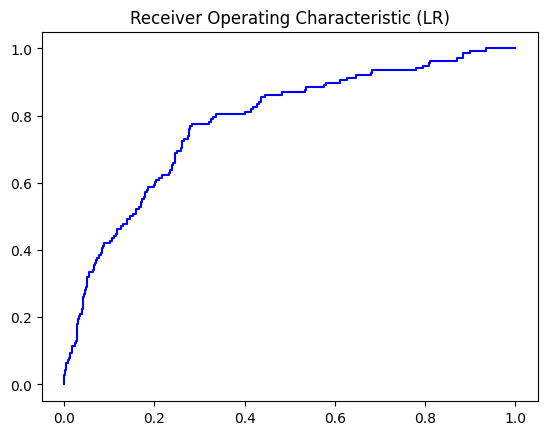

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, best_probs[:,1])
plt.title('Receiver Operating Characteristic (LR)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % best_score);
     

Так можно строить гистограмму

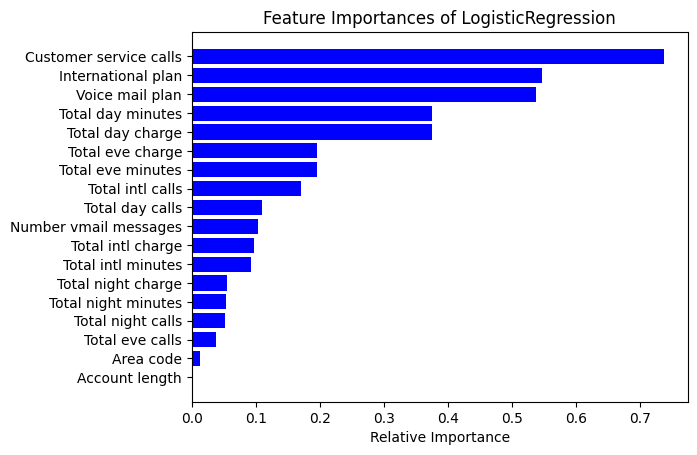

In [22]:

features = X.columns
importances = np.abs(best_model.coef_[0])
indices = np.argsort(importances)

plt.title('Feature Importances of LogisticRegression')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Сделайте выводы:

1) Являются ли данные сбалансированными? Что это означает?

2) Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?